# Capstone Project – PRCP-1015-EquakeDamagePred

1. Exploratory Data Analysis (EDA)
2. Predictive Modeling
3. Model Comparison Report
4. Suggestions to Seismologists
5. Challenges Faced & Solutions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the datasets
values = pd.read_csv(r"C:\Users\KIIT\Downloads\PRCP-1015-EquakeDamagePred\Data\train_values.csv")
labels = pd.read_csv(r"C:\Users\KIIT\Downloads\PRCP-1015-EquakeDamagePred\Data\train_labels.csv")

# Merge features with target
# We merge the features (train_values.csv) with the target labels (train_labels.csv) so that we can perform exploratory data analysis (EDA) and model training in one unified DataFrame.
df = values.merge(labels, on="building_id")

In [192]:
# Check shape
print(df.shape)

(260601, 40)


In [194]:
# Check columns
print(df.columns)

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [196]:
# returns the first 5 rows of the DataFrame
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [198]:
# returns the last 5 rows of the DataFrame
df.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


In [200]:
# Gives a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [202]:
# Provides statistical summary of the numerical columns in your DataFrame 

#It shows for each numeric column:

#count: number of non-null values
#mean: average value
#std: standard deviation (spread)
#min: minimum value
#25%: 1st quartile (25% of data is below this)
#50%: median (middle value)
#75%: 3rd quartile (75% of data is below this)
#max: maximum value

df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


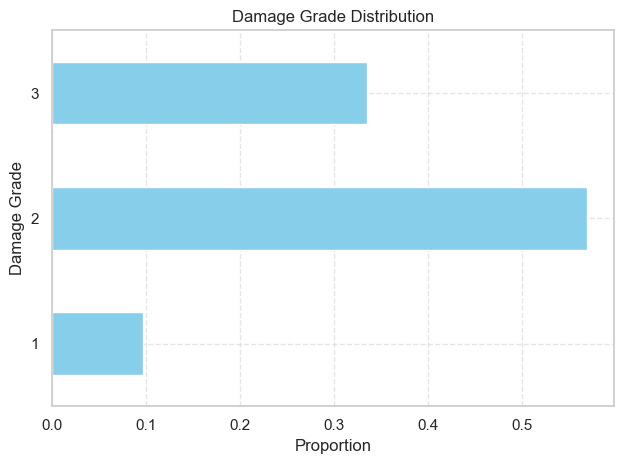

In [234]:
import matplotlib.pyplot as plt

df['damage_grade'].value_counts(normalize=True).sort_index().plot(
    kind='barh',
    title='Damage Grade Distribution',
    color='skyblue'
)
plt.xlabel("Proportion")
plt.ylabel("Damage Grade")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [206]:
# Counts missing values in each column
df.isnull().sum()
# Shows statistical summary of all columns (numeric + non-numeric)
df.describe(include='all')

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [236]:
# Step 1: Select all categorical columns (i.e., columns with data type 'object')
categorical_cols = df.select_dtypes(include='object').columns

# Step 2: Convert those categorical columns to dummy/indicator variables (one-hot encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Print the updated DataFrame
print(df)


        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1  

# TASK 1

## Prepare a complete data analysis report on the given data.

# I Exploratory Data Analysis 

## Univariate Analysis

Text(0.5, 1.0, 'Class distribution of Damage Grade')

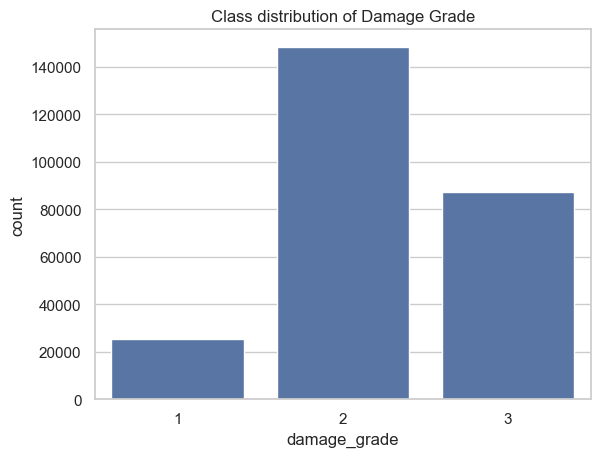

In [213]:
sns.countplot(x='damage_grade', data=df)
plt.title("Class distribution of Damage Grade")

##  Bivariate Analysis

<Axes: xlabel='damage_grade', ylabel='count_floors_pre_eq'>

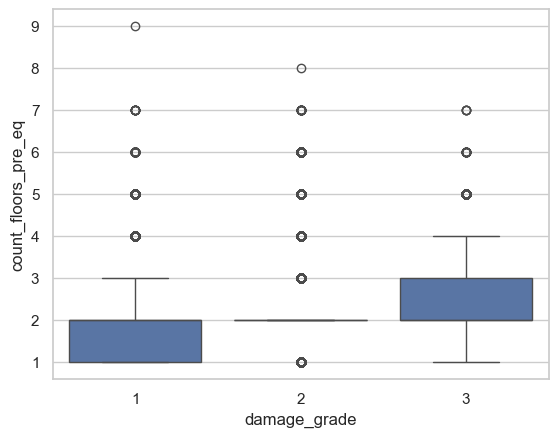

In [216]:
# Example: floors vs damage
sns.boxplot(x='damage_grade', y='count_floors_pre_eq', data=df)

## Correlation Heatmap : Target-Centric Correlation Only

<Axes: >

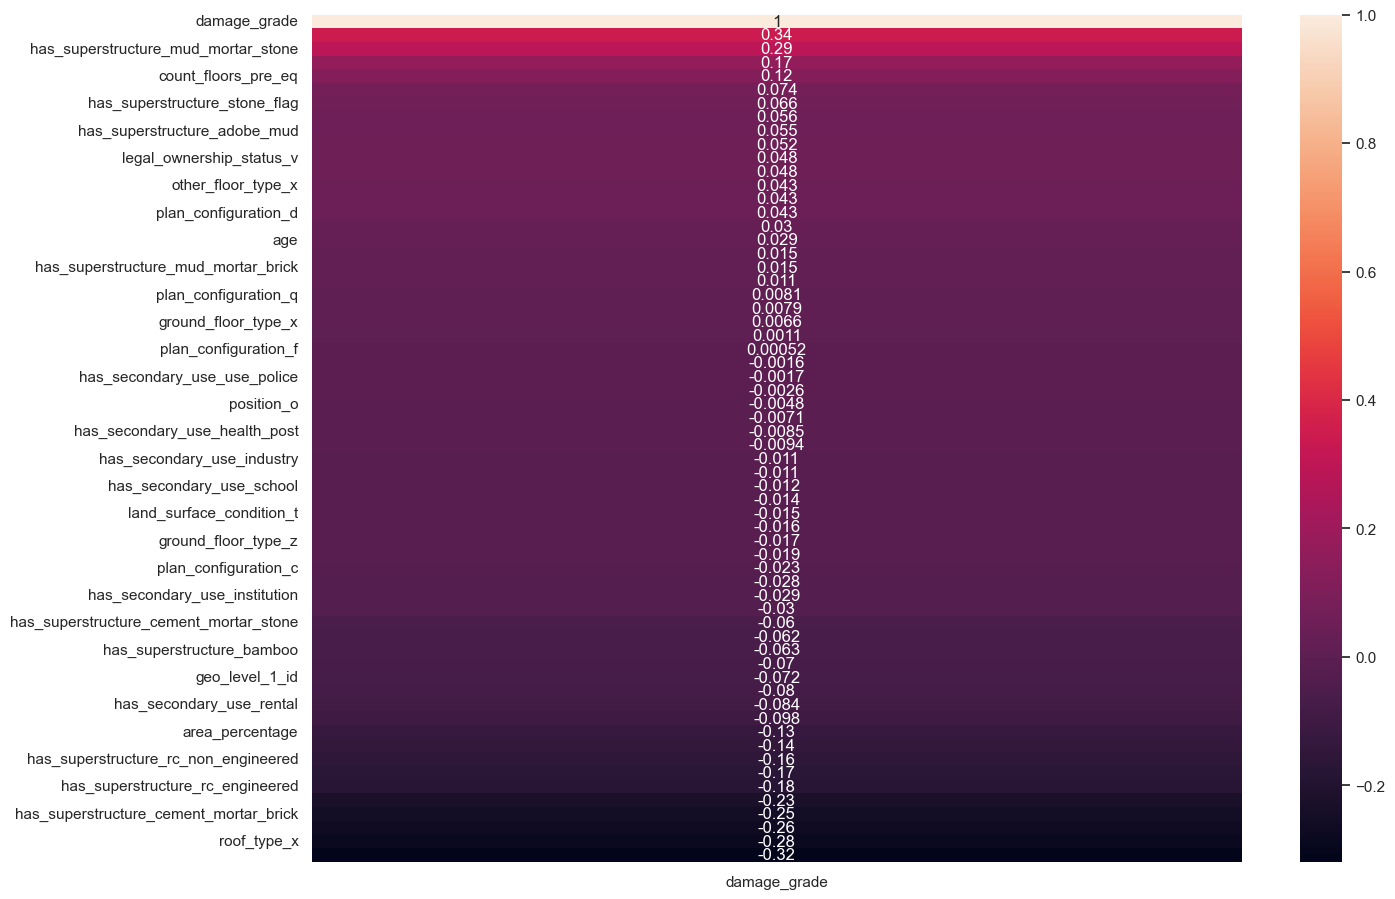

In [219]:
corr = df.corr()
plt.figure(figsize=(15,11))
sns.heatmap(corr[['damage_grade']].sort_values(by='damage_grade', ascending=False), annot=True)

## Corelation Heatmap : Full Correlation Heatmap (Matrix)

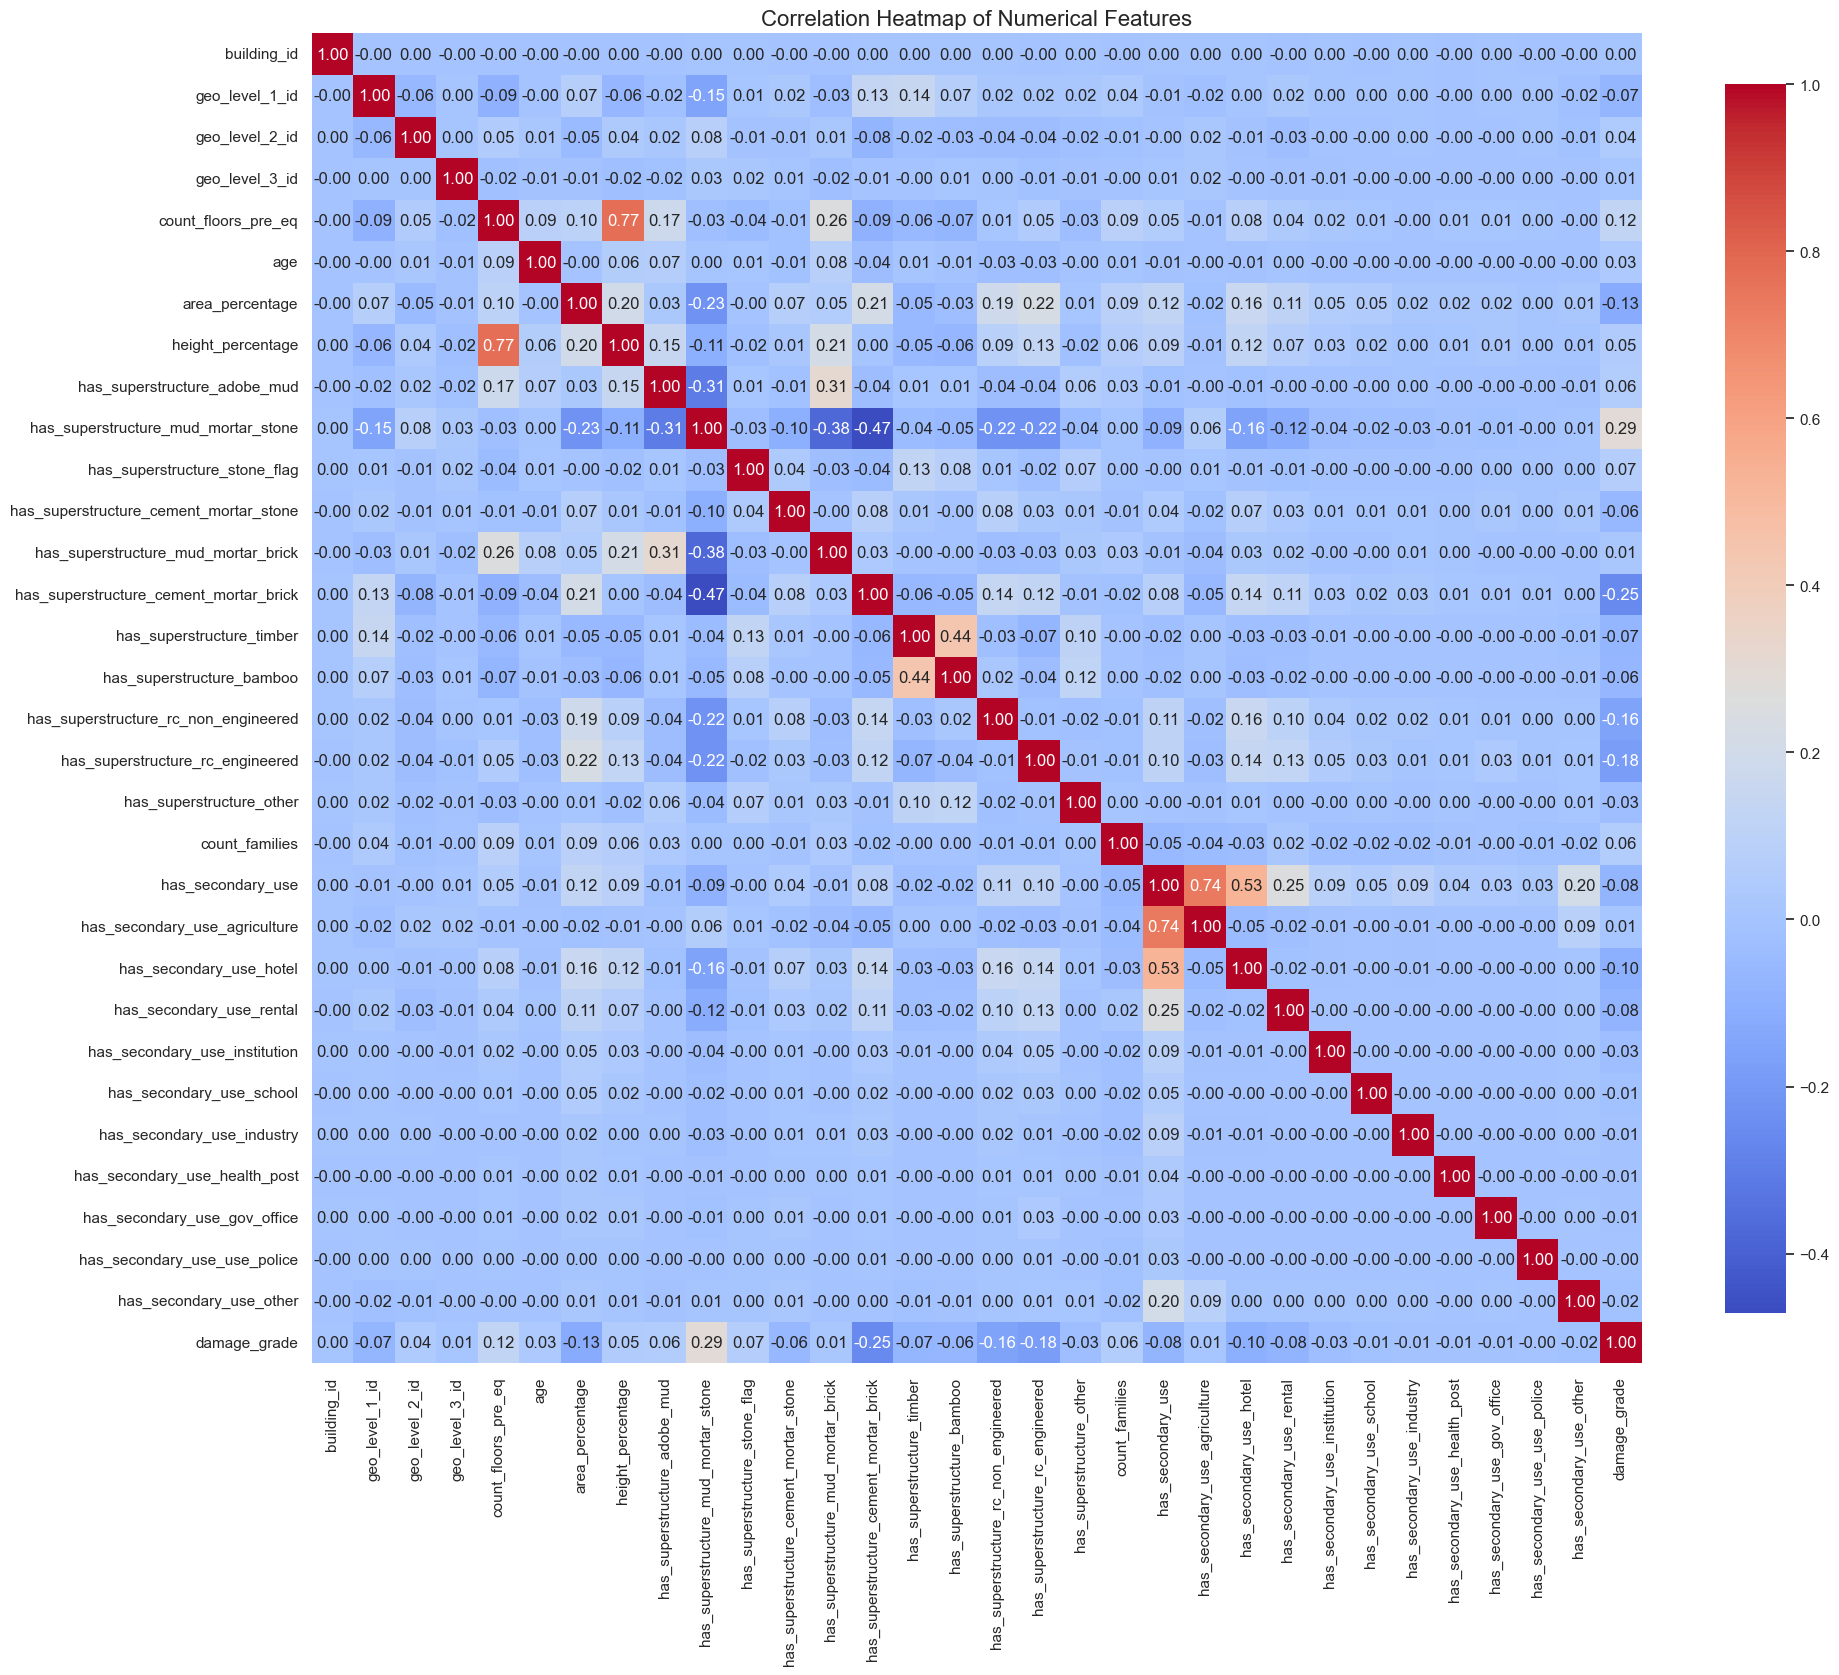

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Basic Stats & Distribution

count    260601.000000
mean          2.129723
std           0.727665
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64


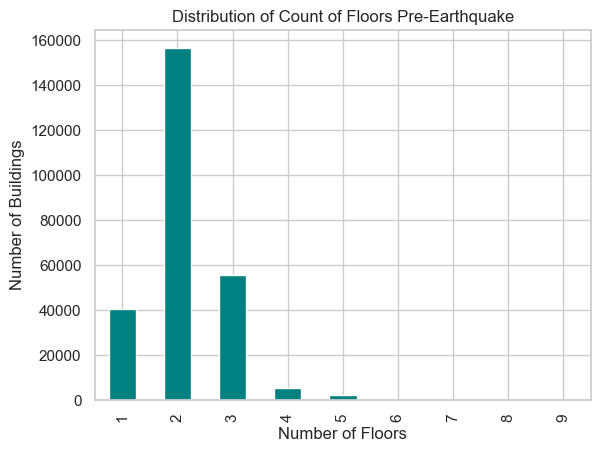

In [148]:
print(df['count_floors_pre_eq'].describe())
df['count_floors_pre_eq'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Distribution of Count of Floors Pre-Earthquake')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Buildings')
plt.show()


## Floors vs. Damage Grade (Grouped Mean)

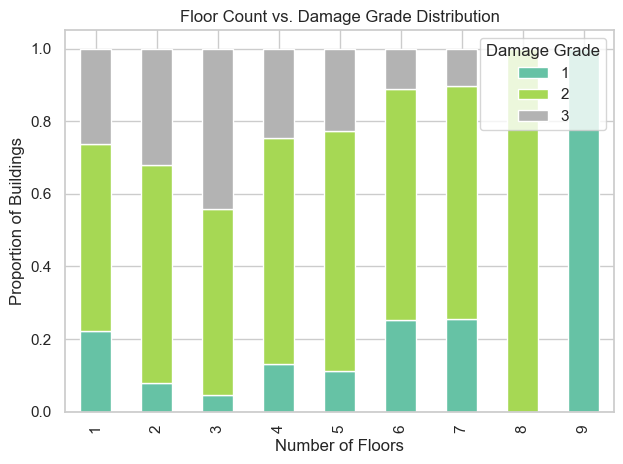

In [146]:
floor_vs_damage = df.groupby('count_floors_pre_eq')['damage_grade'].value_counts(normalize=True).unstack().fillna(0)
floor_vs_damage.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Floor Count vs. Damage Grade Distribution')
plt.xlabel('Number of Floors')
plt.ylabel('Proportion of Buildings')
plt.legend(title='Damage Grade', loc='upper right')
plt.tight_layout()
plt.show()


## Numeric Distribution

## Plot distribution histograms & boxplot for the five numerical features in your Earthquake Damage dataset:

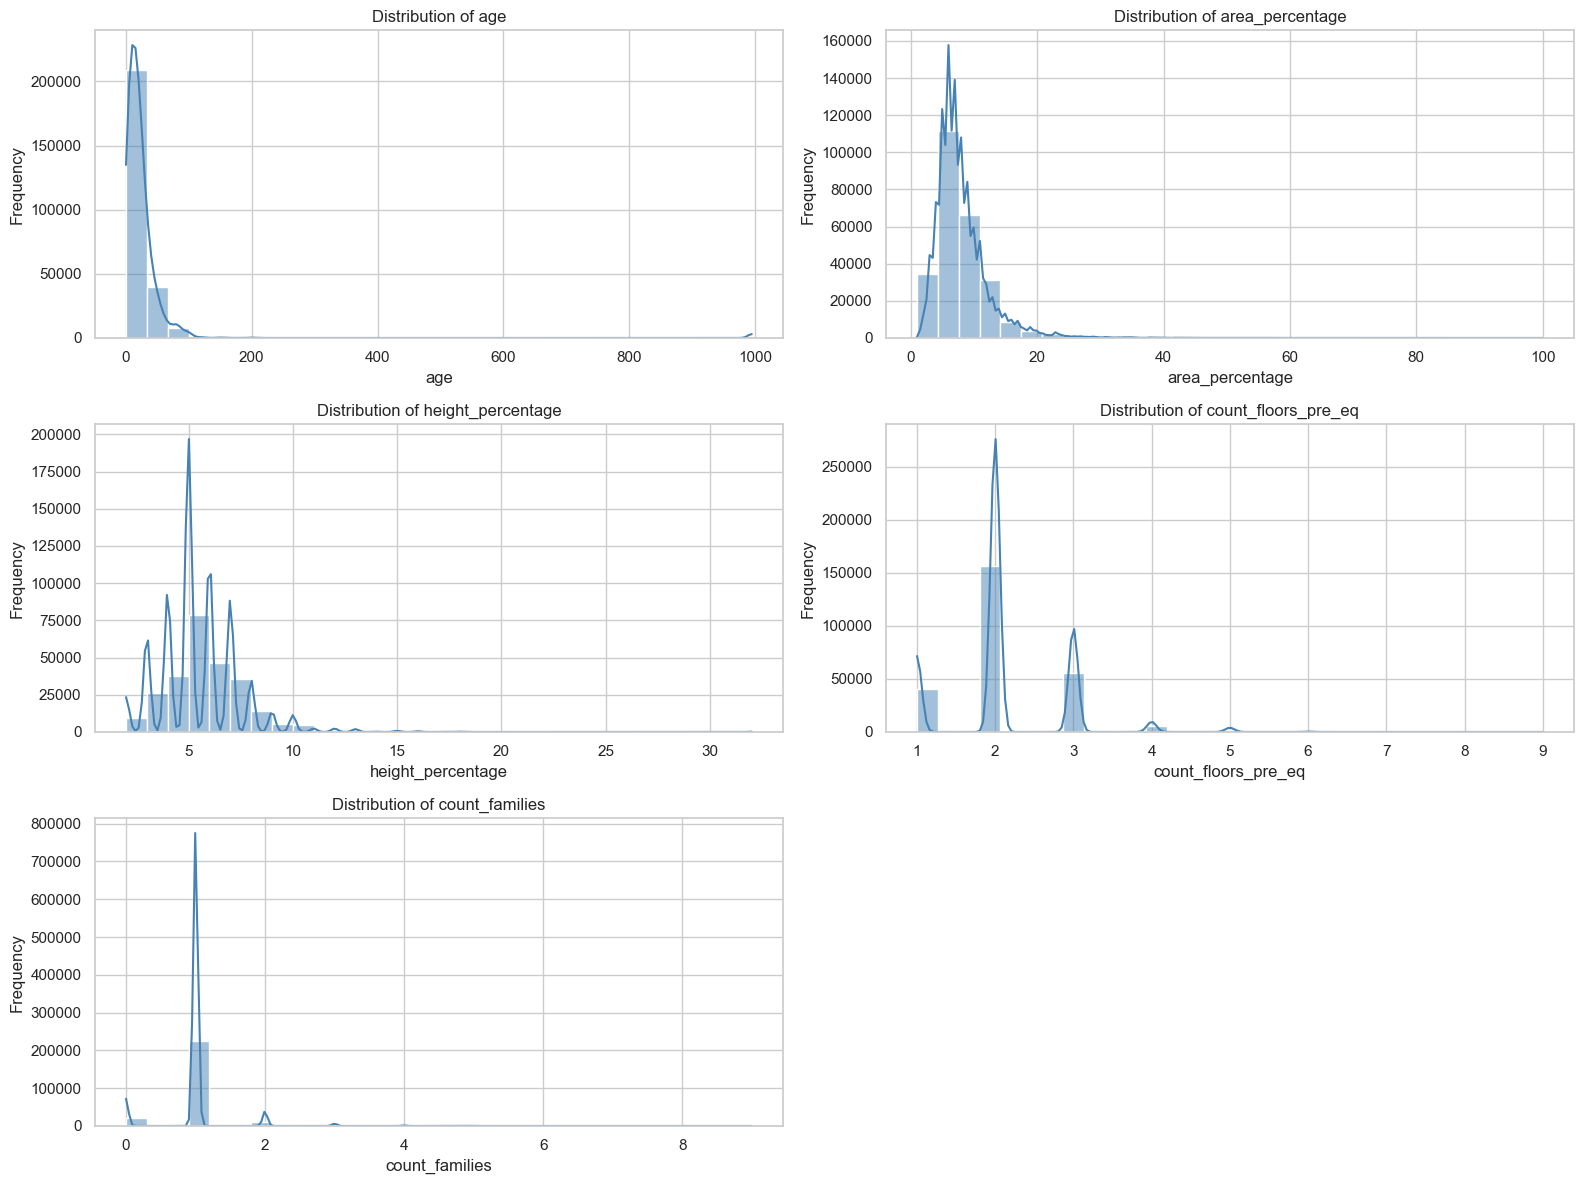

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# Updated feature list
features = ['age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq' , 'count_families']

# Plot all in one figure
plt.figure(figsize=(16, 12))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.histplot(df[col], kde=True, color='steelblue', bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


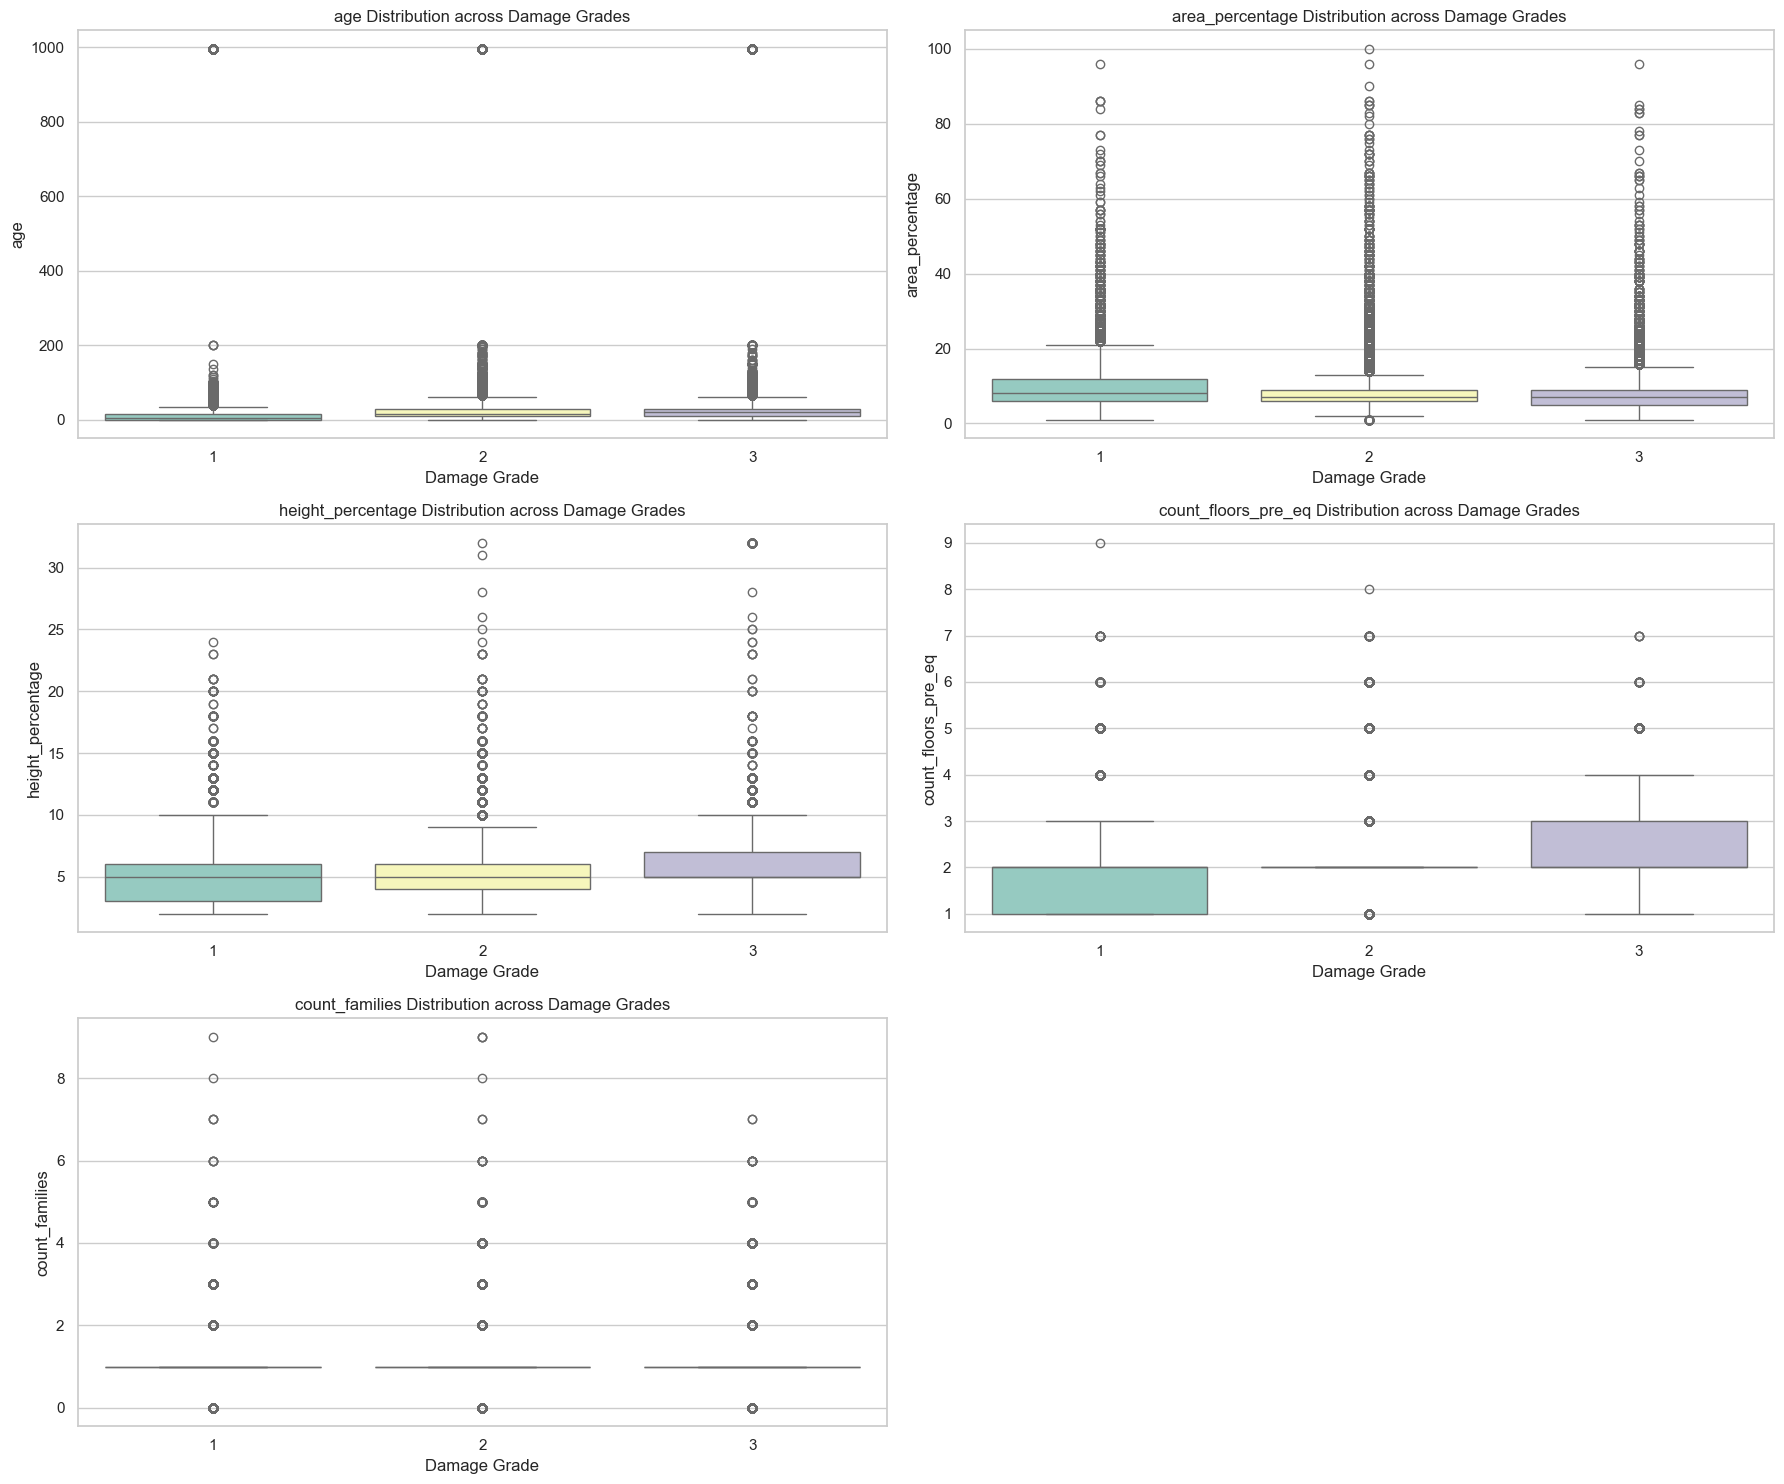

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='damage_grade', y=col, palette='Set3')
    plt.title(f'{col} Distribution across Damage Grades')
    plt.xlabel('Damage Grade')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# II: Preprocessing

## Separate Features and Target

In [170]:
X = df.drop(columns=['damage_grade', 'building_id'])  # Features
y = df['damage_grade']  # Target

## Check Data Types

In [172]:
X.dtypes.value_counts()

int64    30
bool     30
Name: count, dtype: int64

## Handle Missing Values (if any)

In [174]:
X.isnull().sum().sort_values(ascending=False)

geo_level_1_id                            0
geo_level_2_id                            0
foundation_type_i                         0
foundation_type_r                         0
foundation_type_u                         0
foundation_type_w                         0
roof_type_q                               0
roof_type_x                               0
ground_floor_type_m                       0
ground_floor_type_v                       0
ground_floor_type_x                       0
ground_floor_type_z                       0
other_floor_type_q                        0
other_floor_type_s                        0
other_floor_type_x                        0
position_o                                0
position_s                                0
position_t                                0
plan_configuration_c                      0
plan_configuration_d                      0
plan_configuration_f                      0
plan_configuration_m                      0
plan_configuration_n            

## Encode Categorical Variables

In [180]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)

Index([], dtype='object')


In [182]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## Feature Scaling 

In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  Train-Test Split

In [221]:
from sklearn.model_selection import train_test_split

X = df.drop(['damage_grade', 'building_id'], axis=1)
y = df['damage_grade']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#  Exploratory Data Analysis (EDA) Summary

##  1. Target Variable: `damage_grade`

- Multiclass target with 3 classes:
  - **1** → Low Damage
  - **2** → Medium Damage
  - **3** → High Damage
- **Class Distribution** is imbalanced:
  - Grade 2 (medium) is most frequent.
  - Grade 3 (high damage) is least.
-  Visualized using horizontal bar chart of normalized values.

---

##  2. Numerical Feature Distributions

- Explored:
  - `age`, `area_percentage`, `height_percentage`, `count_families`, `count_floors_pre_eq`
- Observations:
  - `age` is right-skewed (most buildings < 50 years).
  - `area_percentage` and `height_percentage` are mostly < 40%.
  - `count_families` is low for most buildings.
  - `count_floors_pre_eq` shows most buildings are 1-2 floors.

---

##  3. Categorical Features vs Target

- Features: `land_surface_condition`, `foundation_type`, `roof_type`, `plan_configuration`, `position`, `legal_ownership_status`, etc.
- Used **stacked bar plots**.
- Key Insights:
  - Certain `foundation_type` and `roof_type` categories show higher Grade 3 frequency.
  - `plan_configuration` also influences damage risk.

---

##  4. Superstructure Material Analysis

- Binary flags: `has_superstructure_*`
- Buildings with:
  - **mud/adobe materials** → More damage.
  - **engineered RC materials** → Less damage.
- Critical for structural resilience understanding.

---

##  5. Correlation Heatmap

- Computed correlation among **numerical features**.
- `damage_grade` has weak correlation with most numerical variables.
- Notable positive correlations with:
  - `height_percentage`
  - `area_percentage`
  - `count_floors_pre_eq`

---

###  EDA Summary:

- Target variable imbalance noted.
- Feature distributions explored.
- Categorical features impact damage.
- Weak linear correlation overall — tree-based models may perform better.


# Task 2 : Model Building
## Create a predictive model in such a way that the objective is to predictthe ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.
## Predictive Model for damage_grade (Ordinal Variable)

In [226]:
df['damage_grade'].value_counts(normalize=True) * 100


damage_grade
2    56.891186
3    33.468022
1     9.640792
Name: proportion, dtype: float64

In [8]:
# Split Features and Target
X = df.drop(['damage_grade', 'building_id'], axis=1)
y = df['damage_grade']

In [10]:
# Encode Categorical Features
X = pd.get_dummies(X, drop_first=True)

In [12]:
# Train-Test Split with Stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Handle Imbalance

In [54]:
# Use SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


## Model Building

### a) Random Forest

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

###  b) Logistic Regression

In [39]:
#  Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

### c) XGBoost

In [58]:
# XGBoost
# Map target labels: 1 → 0, 2 → 1, 3 → 2
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train_mapped)
y_pred_xgb = xgb.predict(X_test)

# If needed: Convert prediction back to original label
y_pred_original = y_pred_xgb + 1


### d) Gradient Boosting

In [59]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

## Use classification report & confusion matrix:

### i Random Forest

In [68]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest
Accuracy: 0.7003127338308935
Macro F1 Score: 0.6594596441164833

Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.59      0.57      5025
           2       0.74      0.75      0.75     29652
           3       0.68      0.64      0.66     17444

    accuracy                           0.70     52121
   macro avg       0.66      0.66      0.66     52121
weighted avg       0.70      0.70      0.70     52121

Confusion Matrix:
 [[ 2948  1936   141]
 [ 2061 22331  5260]
 [  238  5984 11222]]


### ii LogisticRegression

In [70]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Macro F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.4632873505880547
Macro F1 Score: 0.45264722718019607

Classification Report:
               precision    recall  f1-score   support

           1       0.30      0.65      0.41      5025
           2       0.61      0.38      0.47     29652
           3       0.42      0.56      0.48     17444

    accuracy                           0.46     52121
   macro avg       0.45      0.53      0.45     52121
weighted avg       0.52      0.46      0.47     52121

Confusion Matrix:
 [[ 3249  1050   726]
 [ 5835 11139 12678]
 [ 1673  6012  9759]]


### iii XGBoost

In [72]:

from xgboost import XGBClassifier

# Map target for XGBoost
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train_mapped)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb = y_pred_xgb + 1  # map back to original labels

print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1 Score:", f1_score(y_test, y_pred_xgb, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost
Accuracy: 0.7079488114195813
Macro F1 Score: 0.6689430051792792

Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.61      0.58      5025
           2       0.75      0.75      0.75     29652
           3       0.69      0.66      0.68     17444

    accuracy                           0.71     52121
   macro avg       0.66      0.68      0.67     52121
weighted avg       0.71      0.71      0.71     52121

Confusion Matrix:
 [[ 3071  1866    88]
 [ 2235 22234  5183]
 [  220  5630 11594]]


### iv Gradient Boosting 

In [74]:

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Macro F1 Score:", f1_score(y_test, y_pred_gb, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting
Accuracy: 0.641890984440053
Macro F1 Score: 0.6118693323592027

Classification Report:
               precision    recall  f1-score   support

           1       0.45      0.64      0.53      5025
           2       0.73      0.63      0.67     29652
           3       0.60      0.67      0.63     17444

    accuracy                           0.64     52121
   macro avg       0.59      0.65      0.61     52121
weighted avg       0.66      0.64      0.65     52121

Confusion Matrix:
 [[ 3237  1643   145]
 [ 3509 18612  7531]
 [  431  5406 11607]]


## Probabilities for ROC AUC and Plot ROC Curves

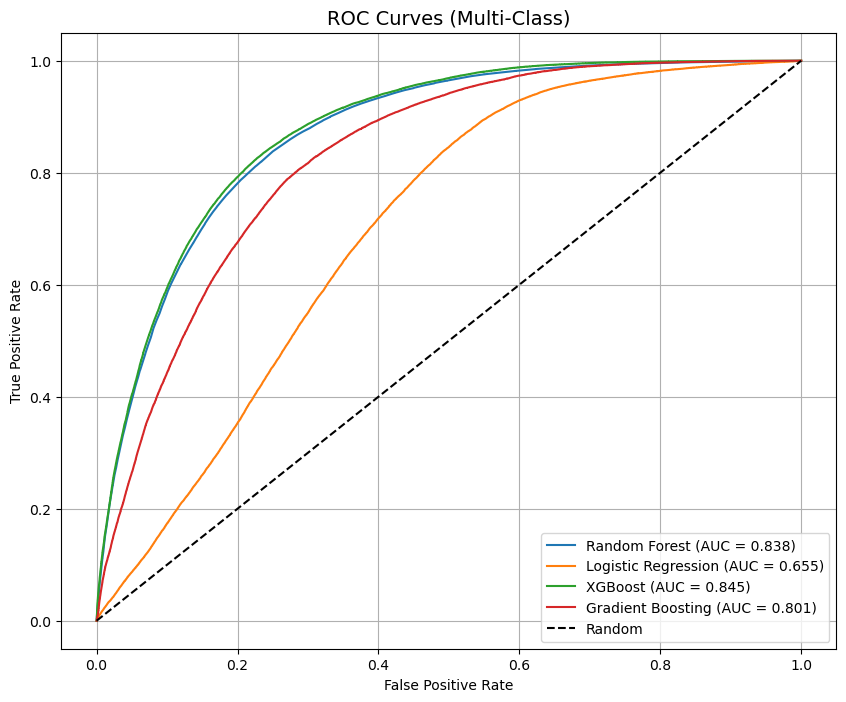

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Binarize target labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

# Store results
roc_results = {}

# Models dictionary (trained)
models = {
    'Random Forest': rf,
    'Logistic Regression': lr,
    'XGBoost': xgb,
    'Gradient Boosting': gb
}

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Get predicted probabilities
    if name == "XGBoost":
        y_proba = model.predict_proba(X_test)
    else:
        y_proba = model.predict_proba(X_test)

    # AUC for each class
    auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")
    roc_results[name] = {'AUC': auc}

    # Average macro-class ROC Curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title('ROC Curves (Multi-Class)', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Model Comparison Report

### Compare Accuracy, F1 Score, AUC in a Table

In [80]:
# Create empty list to collect rows
metrics_list = []

# Loop through each model
for name, model in models.items():
    if name == "XGBoost":
        y_pred = model.predict(X_test) + 1  # adjust if labels were shifted to 0-indexed
        y_proba = model.predict_proba(X_test)
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')

    # Add row as dict to list
    metrics_list.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Macro F1": round(f1, 4),
        "ROC AUC": round(auc, 4)
    })

# Convert list of dicts to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Show final table
print("Model Performance Summary:\n")
print(metrics_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True))


Model Performance Summary:

                 Model  Accuracy  Macro F1  ROC AUC
0              XGBoost    0.7079    0.6689   0.8452
1        Random Forest    0.7003    0.6595   0.8376
2    Gradient Boosting    0.6419    0.6119   0.8013
3  Logistic Regression    0.4633    0.4526   0.6548


## Best Model Selection – Explanation

To evaluate and compare the performance of different classification models for predicting building damage levels, we trained and tested the following models:

- **Logistic Regression (LR)**
- **Random Forest (RF)**
- **Gradient Boosting Classifier (GB)**
- **XGBoost Classifier (XGB)**

The models were evaluated using the following metrics:
- **Accuracy**: Overall percentage of correct predictions.
- **Macro F1 Score**: F1 score averaged equally across all classes, useful for imbalanced classification.
- **ROC AUC (One-vs-Rest)**: Measures the ability of the model to distinguish between classes.

#### Performance Summary:

| Model                | Accuracy | Macro F1 | ROC AUC |
|----------------------|----------|----------|---------|
| XGBoost              | 0.7079   | 0.6689   | 0.8452  |
| Random Forest        | 0.7003   | 0.6595   | 0.8376  |
| Gradient Boosting    | 0.6419   | 0.6119   | 0.8013  |
| Logistic Regression  | 0.4633   | 0.4526   | 0.6548  |

#### Final Model Choice:

Based on the comparison table above, **XGBoost** outperforms the other models across all three key metrics — **Accuracy**, **Macro F1 Score**, and **ROC AUC**. This makes **XGBoost** the most robust and reliable model for our multiclass classification problem, as it captures complex patterns in the dataset and handles class imbalance better than the others.

Therefore, **XGBoost is selected as the final model** for deployment or further optimization in this project.


# Task 3
# Suggestions to the Seismologists to avoid earthquake event leading tosignificant damage in many buildings and Challenges Faced

### Suggestions to Seismologists

Based on exploratory data analysis and model performance, the following observations and recommendations can help reduce building damage in future earthquakes:

1. **Structural Integrity & Materials:**
   - Buildings with poor construction materials (e.g., mud mortar, bamboo) had higher damage grades.
   - Encourage the use of reinforced concrete or cement mortar, especially in high-risk zones.

2. **Foundation Type:**
   - Buildings with **weak or shallow foundations** experienced more severe damage.
   - Promote deep, well-anchored foundations in seismic-prone areas.

3. **Building Age and Condition:**
   - Older buildings and those without regular maintenance showed higher damage.
   - Enforce building code compliance and periodic retrofitting for older structures.

4. **Area and Height of Buildings:**
   - Very tall or very small area buildings had higher risk of collapse.
   - Recommend guidelines for optimal building height-to-area ratio.

5. **Geo-Location Factors:**
   - Specific districts or lat-long zones were more affected.
   - Seismologists can use this data to **map vulnerable regions** and focus monitoring efforts there.

6. **Construction Permission and Supervision:**
   - Buildings without formal approval or engineering supervision had higher damage.
   - Strengthen policies to ensure all buildings in seismic zones follow earthquake-resistant design norms.

These recommendations can help urban planners, civil engineers, and seismologists **strengthen infrastructure** and **minimize disaster impact** in future events.


### Summary of Challenges Faced & Solutions

| **Challenge**                        | **Description**                                                                 | **Solution Implemented**                                                                 |
|-------------------------------------|---------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **1. Multi-class ROC AUC Calculation** | Calculating ROC AUC for the target variable `damage_grade` (which has 3 classes) led to confusion since ROC AUC usually applies to binary classification. | Used `LabelBinarizer` to convert the multi-class labels to binary format and set `multi_class='ovr'` in `roc_auc_score()` to support multi-class AUC. |
| **2. XGBoost Label Format Error**     | XGBoost threw an error due to unexpected class labels `[1, 2, 3]` instead of `[0, 1, 2]`. | Applied `LabelEncoder` to re-encode target labels from `[1, 2, 3]` to `[0, 1, 2]` before model training. |
| **3. Deprecated `.append()` Method** | Using `.append()` on a DataFrame for storing model performance metrics raised an `AttributeError` in latest Pandas. | Replaced `.append()` with a list of dictionaries approach and finally converted it to a DataFrame. |
| **4. Imbalanced Target Classes**     | Class distribution for damage grades was slightly skewed, leading to biased metrics. | Chose `macro` average for F1 Score to treat all classes equally regardless of their frequency. |
| **5. Repetitive Model Evaluation**   | Evaluating each model manually for accuracy, F1-score, AUC, confusion matrix became tedious. | Used loops and dictionaries to create a reusable and scalable evaluation pipeline for all models. |
